In [18]:
import pandas as pd
import numpy as np
from time import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
plt.style.use('ggplot')

from features.data_provider import get_train_test_wc_dataset, get_feature_columns, get_whole_dataset

In [3]:
X_train, y_train, X_test, y_test, X_wc, y_wc = get_train_test_wc_dataset("home_score")

Dataset length 39008
Dataset complete cases length 6676
Whole train set length:  5601
Whole test set length:  1075
Whole WC set length:  128


<Figure size 1440x432 with 0 Axes>

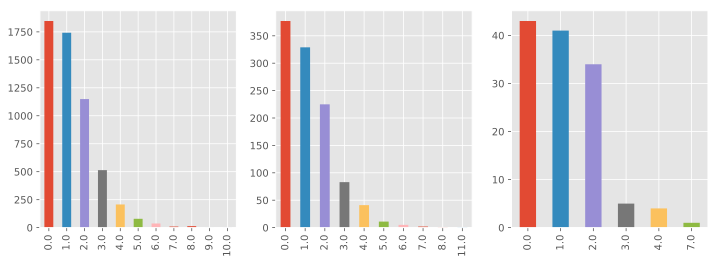

In [13]:
plt.figure(figsize=(20, 6))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
pd.value_counts(y_train).sort_index().plot.bar(ax=axes[0])
pd.value_counts(y_test).sort_index().plot.bar(ax=axes[1])
pd.value_counts(y_wc).sort_index().plot.bar(ax=axes[2])

In [21]:
def get_feature_importance(clf):
    zipped = sorted(zip(get_feature_columns(), clf.feature_importances_), key = lambda t: t[1], reverse=True)
    for feature, importance in zipped:
        print(f"{feature}: {importance}")
        
def run_grid_search(clf, param_grid, Xtrain, ytrain, Xtest, ytest, X_wc, y_wc, custom_report_for_model=None):
    grid_search = GridSearchCV(clf, param_grid=param_grid)
    start = time()
    grid_search.fit(Xtrain, ytrain)
    print("TRAIN SET METRICS:")
    print("SCORE: ", end='')
    y_pred = grid_search.predict(Xtrain)
    y_pred = np.around(y_pred)
    print(sum(y_pred == ytrain) / len(Xtrain))
    print("BEST PARAMS: ", grid_search.best_params_)
    print()
    print()
    
    print("TEST SET METRICS:")
    print("SCORE: ", end='')
    y_pred = grid_search.predict(Xtest)
    y_pred = np.around(y_pred)
    print(sum(y_pred == ytest) / len(Xtest))
        
    print()
    print()
    print("WC SET METRICS:")
    print("SCORE: ", end='')
    y_pred = grid_search.predict(X_wc)
    y_pred = np.around(y_pred)
    print(sum(y_pred == y_wc) / len(X_wc))
    
    print()
    print()
    if custom_report_for_model:
        custom_report_for_model(grid_search.best_estimator_)
    return grid_search.best_estimator_

In [23]:
clf = RandomForestRegressor(oob_score=True, bootstrap=True, n_jobs=-1)

param_grid = {"n_estimators": [1000],
              "max_depth": [3,5,8,None],
              "min_samples_leaf": [1,3,5,7],
              "max_features": ["sqrt"]}
best_clf = run_grid_search(clf, param_grid,
                             X_train, y_train, 
                             X_test, y_test, 
                             X_wc, y_wc,
                             custom_report_for_model=get_feature_importance)

TRAIN SET METRICS:
SCORE: 0.35154436707730763
BEST PARAMS:  {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 1000}


TEST SET METRICS:
SCORE: 0.33488372093023255


WC SET METRICS:
SCORE: 0.3125


elo_diff: 0.15060762667789346
rating_diff: 0.061760671296307815
potential_diff: 0.05935734591657141
dribbling_diff: 0.04855158534287935
reactions_diff: 0.045606295596153264
crossing_diff: 0.040455431509177124
away_goal_mean: 0.0361665633551327
internationl_repuatiotion_diff: 0.03445505914873491
short_passing_diff: 0.03187659703794553
finishing_diff: 0.03184211928987426
ball_control_diff: 0.02780295385952649
long_passing_diff: 0.02618665993527883
long_shots_diff: 0.025600081652851367
marking_diff: 0.02258111650478372
shot_power_diff: 0.021791267594708213
standing_tackle_diff: 0.020415506767945336
fk_accuracy_diff: 0.02029577505082857
home_goals_with_away: 0.019622431042058186
gk_diving_diff: 0.01949378269551427
height_diff: 0.019197103470628467
home_goal_mean: 0.0